# [Life Expectancy dataset](https://www.kaggle.com/kumarajarshi/life-expectancy-who)


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

# Goal

My goal in this challenge is to find the factors that affect the life expectancy. I will specifically focus on the factors that increase the expected life as well as the factors that decrease the life expectancy in the countries.

Let's first load the dataset and explore its contents.

In [2]:
# loading the dataset:
import os

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

life_expectancy = pd.read_sql_query('select * from lifeexpectancy', con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


The dataset consist of the following features:

- Country 
- Year
- Status: Developed or developing
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000                          population)
- Infant Deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
- Percentage Expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: Measles - number of reported cases per 1000 population
- BMI: Average Body Mass Index of entire population
- Under-five deaths: Number of under-five deaths per 1000 population
- Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- Thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index                                          ranging from 0 to 1)
- Schooling: Number of years of Schooling(years)

**Data Exploration**

let's now use Panda's .info() function to get an understanding of the different attributes of the dataset as well as its inherent datatypes.

In [4]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

The dataset contains 2938 observations and 22 columns in total. It appears that all fields are numeric(int and float) except for 'Country' and 'Status' which are object variables.

Upon investigating we can also see that not all features contain the same amount of rows. This could be due to missing values and outliers in our dataset.

In [5]:
# Finding the unique values in our observations.
life_expectancy.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

This dataset consist of the life expectancy data of 193 distinct countries for 16 years. It also gives an understanding of the categories such as Immunization related factors, Mortality factors, Economical factors and Social factors.

**1. Detecting Problems with data**

My goal here is to detect the missing values and outliers stemmed during data collection. 

Let's first detect the nonsense values and delve into different techniques to eliminate them.

In [6]:
# Finding Missing values in the dataset:
life_expectancy.isnull().head(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# Finding the missing values as a percetage of total value counts

life_expectancy.isnull().sum()*100 / life_expectancy.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

It appears there are more missing values in Hepatitis B, Population, and GDP fields.

In [8]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
# Eliminating the spaces between columns:
life_expectancy.columns = ['_'.join(x.split()) for x in list([x.str.strip().str.lower() for x in [life_expectancy.columns]])[0]]
life_expectancy.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

Next, I will be using the .fillna() function to replace the missing values in the columns with its mean. I am using the mean in imputation because I believe that it will maintain our sample size and make our analysis more favorable.

In [10]:
# Creating a list to fill in the missing values
fill_list = ["life_expectancy", "adult_mortality", "alcohol", 
             "hepatitis_b", "bmi", "polio", 
             "total_expenditure", "diphtheria",
             "gdp", "thinness_1-19_years", "thinness_5-9_years", "population", "income_composition_of_resources", "schooling"]
# Fill in all missing values from the column with the average of the same column
country = life_expectancy["country"].unique()

In [11]:
# Let's now fill the missing values with the mean.

for col in fill_list:
    for state in country: 
        if len(life_expectancy.loc[life_expectancy["country"] == state][col].unique())==1: 
            #col value is all null for that year, then fill it with 0 
            life_expectancy.loc[life_expectancy["country"] == state,  col]= life_expectancy.loc[life_expectancy["country"] == state,  col].fillna(0)
        else: 
            life_expectancy.loc[life_expectancy['country'] == state,  col] = life_expectancy.loc[life_expectancy["country"] == state, col].fillna(life_expectancy[(life_expectancy["country"] == state) & (life_expectancy[col].isnull()==False) ][col].mean())

In [12]:
# Let's take a look into the data after eliminating missing values:

life_expectancy.isnull().sum()*100/life_expectancy.isnull().count()

country                            0.0
year                               0.0
status                             0.0
life_expectancy                    0.0
adult_mortality                    0.0
infant_deaths                      0.0
alcohol                            0.0
percentage_expenditure             0.0
hepatitis_b                        0.0
measles                            0.0
bmi                                0.0
under-five_deaths                  0.0
polio                              0.0
total_expenditure                  0.0
diphtheria                         0.0
hiv/aids                           0.0
gdp                                0.0
population                         0.0
thinness_1-19_years                0.0
thinness_5-9_years                 0.0
income_composition_of_resources    0.0
schooling                          0.0
dtype: float64

Let's now detect the outliers in the dataset. 

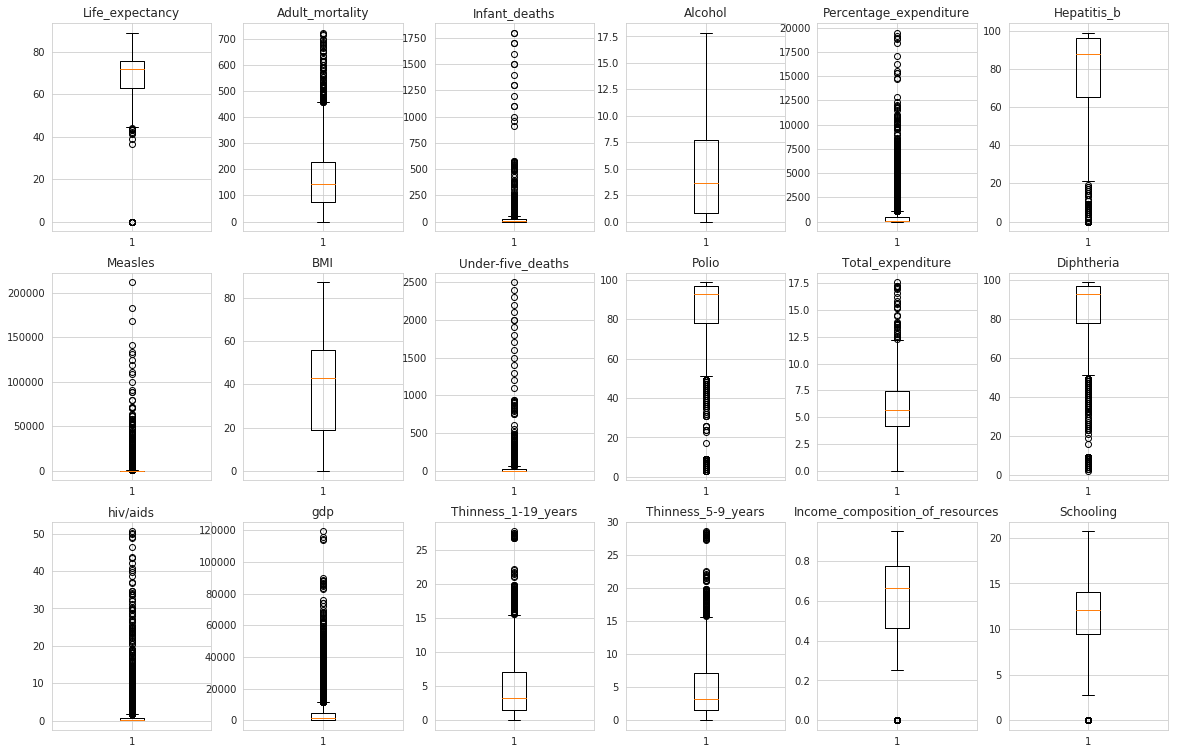

In [13]:
# Using the box plot to detect outliers.

plt.figure(figsize = (20, 13))

plt.subplot(3,6,1)
plt.boxplot(life_expectancy["life_expectancy"])
plt.title("Life_expectancy")

plt.subplot(3,6,2)
plt.boxplot(life_expectancy["adult_mortality"])
plt.title("Adult_mortality")

plt.subplot(3,6,3)
plt.boxplot(life_expectancy["infant_deaths"])
plt.title("Infant_deaths")

plt.subplot(3,6,4)
plt.boxplot(life_expectancy["alcohol"])
plt.title("Alcohol")

plt.subplot(3,6,5)
plt.boxplot(life_expectancy["percentage_expenditure"])
plt.title("Percentage_expenditure")

plt.subplot(3,6,6)
plt.boxplot(life_expectancy["hepatitis_b"])
plt.title("Hepatitis_b")

plt.subplot(3,6,7)
plt.boxplot(life_expectancy["measles"])
plt.title("Measles")

plt.subplot(3,6,8)
plt.boxplot(life_expectancy["bmi"])
plt.title("BMI")

plt.subplot(3,6,9)
plt.boxplot(life_expectancy["under-five_deaths"])
plt.title("Under-five_deaths")

plt.subplot(3,6,10)
plt.boxplot(life_expectancy["polio"])
plt.title("Polio")

plt.subplot(3,6,11)
plt.boxplot(life_expectancy["total_expenditure"])
plt.title("Total_expenditure")

plt.subplot(3,6,12)
plt.boxplot(life_expectancy["diphtheria"])
plt.title("Diphtheria")

plt.subplot(3,6,13)
plt.boxplot(life_expectancy["hiv/aids"])
plt.title("hiv/aids")

plt.subplot(3,6,14)
plt.boxplot(life_expectancy["gdp"])
plt.title("gdp")

plt.subplot(3,6,15)
plt.boxplot(life_expectancy["thinness_1-19_years"])
plt.title("Thinness_1-19_years")

plt.subplot(3,6,16)
plt.boxplot(life_expectancy["thinness_5-9_years"])
plt.title("Thinness_5-9_years")

plt.subplot(3,6,17)
plt.boxplot(life_expectancy["income_composition_of_resources"])
plt.title("Income_composition_of_resources")

plt.subplot(3,6,18)
plt.boxplot(life_expectancy["schooling"])
plt.title("Schooling")

plt.show()

It is evident that infant_deaths, measles, under_five_deaths have more outliers that other variables.

In order to eliminate the outliers, I will use the Tukey method as it is more appropriate in visualizing outliers with box plots.

In [16]:
columns = ['life_expectancy', 'adult_mortality',
           'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
           'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure',
           'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness_1-19_years',
           'thinness_5-9_years', 'income_composition_of_resources', 'schooling']

for col in columns:
    q75, q25 = np.percentile(life_expectancy[col], [75 ,25])
    iqr = q75 - q25


    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers for {} is: {} ".format(col, len((np.where((life_expectancy[col] > max_val) 
                      | (life_expectancy[col] < min_val))[0])), len((np.where((life_expectancy[col] > max_val) | 
                                                    (life_expectancy[col] < min_val))[0]))))

Number of outliers for life_expectancy is: 20 
Number of outliers for adult_mortality is: 85 
Number of outliers for infant_deaths is: 315 
Number of outliers for alcohol is: 0 
Number of outliers for percentage_expenditure is: 389 
Number of outliers for hepatitis_b is: 333 
Number of outliers for measles is: 542 
Number of outliers for bmi is: 0 
Number of outliers for under-five_deaths is: 394 
Number of outliers for polio is: 290 
Number of outliers for total_expenditure is: 34 
Number of outliers for diphtheria is: 309 
Number of outliers for hiv/aids is: 542 
Number of outliers for gdp is: 430 
Number of outliers for population is: 438 
Number of outliers for thinness_1-19_years is: 89 
Number of outliers for thinness_5-9_years is: 96 
Number of outliers for income_composition_of_resources is: 297 
Number of outliers for schooling is: 191 


I will use the winsorization technique to limit the values of the outliers. Scipy's **winsorize()** method sets the values of the extreme points to the value of a specified percentile so that we are able to detect outliers easily.

In [18]:
from scipy.stats.mstats import winsorize

winsorized_list = ['life_expectancy_winsorized', 'adult_mortality_winsorized', 'infant_deaths_winsorized', 
                   'alcohol_winsorized', 'percentage_expenditure_winsorized', 'hepatitis_b_winsorized',
                   'measles_winsorized', 'bmi_winsorized', 'under_five_deaths_winsorized', 'polio_winsorized',
                   'total_expenditure_winsorized', 'diphtheria_winsorized', 'hiv_aids_winsorized', 'gdp_winsorized', 
                   'population_winsorized', 'thinness_1_19_years_winsorized', 'thinness_5_9_years_winsorized',
                   'income_composition_of_resources_winsorized', 'schooling_winsorized']

Text(0.5, 1.0, 'life_expectancy_winsorized')

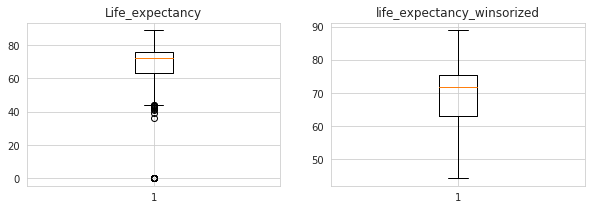

In [21]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["life_expectancy"])
plt.title("Life_expectancy")

life_expectancy_winsorized = winsorize(life_expectancy["life_expectancy"], (0.007, 0))
plt.subplot (1,2,2)
plt.boxplot(life_expectancy_winsorized)
plt.title("life_expectancy_winsorized")

Text(0.5, 1.0, 'infant_deaths_winsorized')

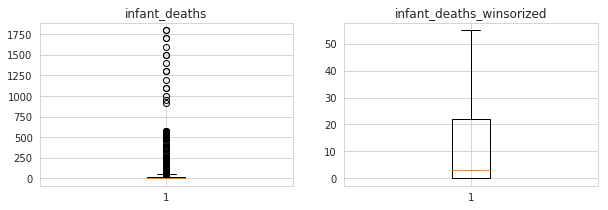

In [23]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["infant_deaths"])
plt.title("infant_deaths")

infant_deaths_winsorized = winsorize(life_expectancy["infant_deaths"], (0, 0.109))
plt.subplot (1,2,2)
plt.boxplot(infant_deaths_winsorized)
plt.title("infant_deaths_winsorized")

Text(0.5, 1.0, 'adult_mortality_winsorized')

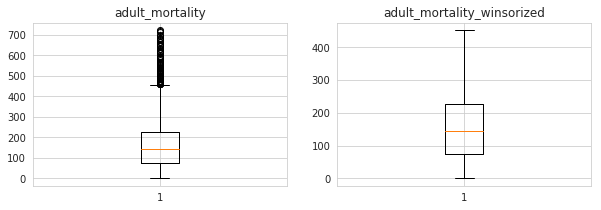

In [24]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["adult_mortality"])
plt.title("adult_mortality")

adult_mortality_winsorized = winsorize(life_expectancy["adult_mortality"], (0, 0.03))
plt.subplot (1,2,2)
plt.boxplot(adult_mortality_winsorized)
plt.title("adult_mortality_winsorized")

Text(0.5, 1.0, 'percentage_expenditure_winsorized')

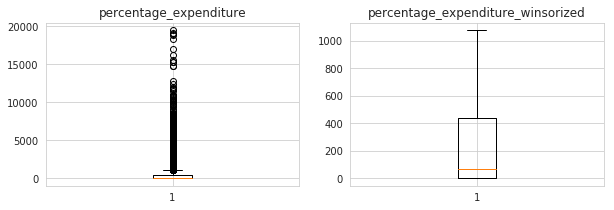

In [25]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["percentage_expenditure"])
plt.title("percentage_expenditure")

percentage_expenditure_winsorized = winsorize(life_expectancy["percentage_expenditure"], (0, 0.135))
plt.subplot (1,2,2)
plt.boxplot(percentage_expenditure_winsorized)
plt.title("percentage_expenditure_winsorized")

Text(0.5, 1.0, 'hepatitis_b_winsorized')

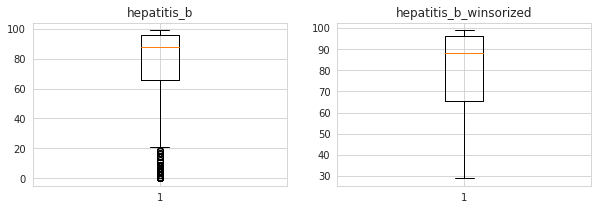

In [26]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["hepatitis_b"])
plt.title("hepatitis_b")

hepatitis_b_winsorized = winsorize(life_expectancy["hepatitis_b"], (0.12, 0))
plt.subplot (1,2,2)
plt.boxplot(hepatitis_b_winsorized)
plt.title("hepatitis_b_winsorized")

Text(0.5, 1.0, 'measles_winsorized')

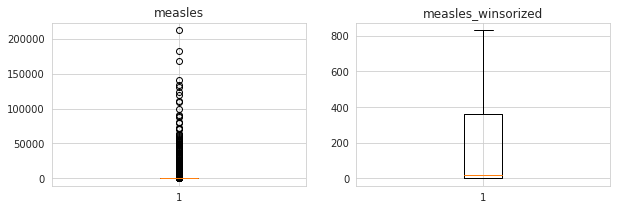

In [27]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["measles"])
plt.title("measles")

measles_winsorized = winsorize(life_expectancy["measles"], (0, 0.19))
plt.subplot (1,2,2)
plt.boxplot(measles_winsorized)
plt.title("measles_winsorized")

Text(0.5, 1.0, 'under_five_deaths_winsorized')

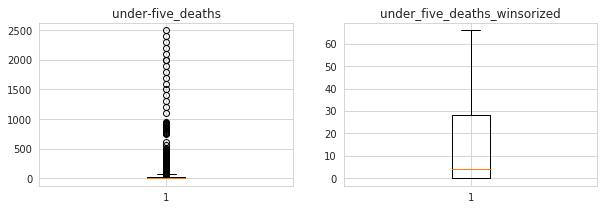

In [28]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["under-five_deaths"])
plt.title("under-five_deaths")

under_five_deaths_winsorized = winsorize(life_expectancy["under-five_deaths"], (0, 0.14))
plt.subplot (1,2,2)
plt.boxplot(under_five_deaths_winsorized)
plt.title("under_five_deaths_winsorized")

Text(0.5, 1.0, 'polio_winsorized')

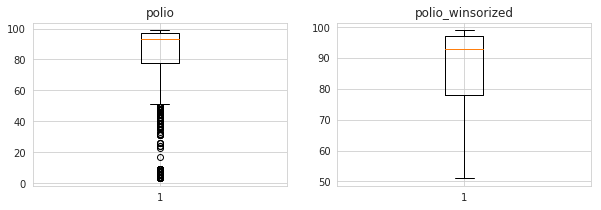

In [29]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["polio"])
plt.title("polio")

polio_winsorized = winsorize(life_expectancy["polio"], (0.1, 0))
plt.subplot (1,2,2)
plt.boxplot(polio_winsorized)
plt.title("polio_winsorized")

Text(0.5, 1.0, 'total_expenditure_winsorized')

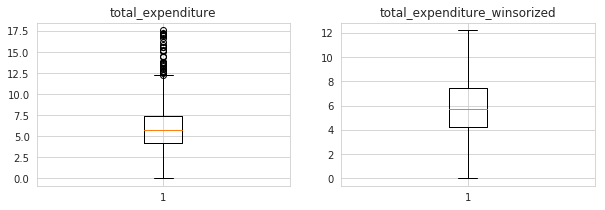

In [30]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["total_expenditure"])
plt.title("total_expenditure")

total_expenditure_winsorized = winsorize(life_expectancy["total_expenditure"], (0, 0.012))
plt.subplot (1,2,2)
plt.boxplot(total_expenditure_winsorized)
plt.title("total_expenditure_winsorized")

Text(0.5, 1.0, 'diphtheria_winsorized')

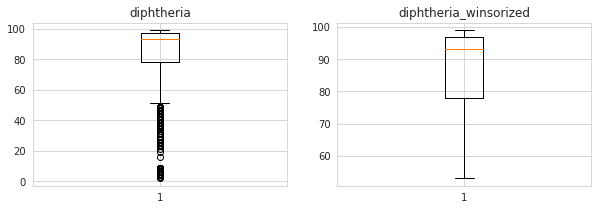

In [31]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["diphtheria"])
plt.title("diphtheria")

diphtheria_winsorized = winsorize(life_expectancy["diphtheria"], (0.11, 0))
plt.subplot (1,2,2)
plt.boxplot(diphtheria_winsorized)
plt.title("diphtheria_winsorized")

Text(0.5, 1.0, 'hiv_aids_winsorized')

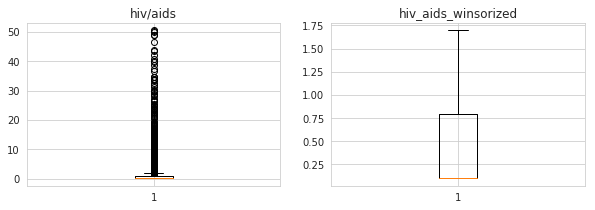

In [32]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["hiv/aids"])
plt.title("hiv/aids")

hiv_aids_winsorized = winsorize(life_expectancy["hiv/aids"], (0, 0.19))
plt.subplot (1,2,2)
plt.boxplot(hiv_aids_winsorized)
plt.title("hiv_aids_winsorized")

Text(0.5, 1.0, 'gdp_winsorized')

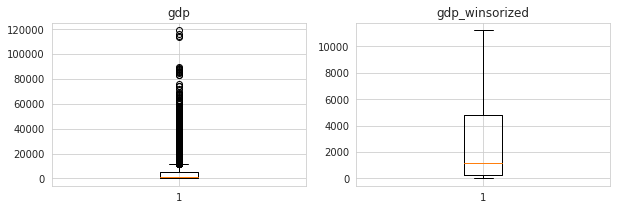

In [33]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["gdp"])
plt.title("gdp")

gdp_winsorized = winsorize(life_expectancy["gdp"], (0, 0.15))
plt.subplot (1,2,2)
plt.boxplot(gdp_winsorized)
plt.title("gdp_winsorized")

Text(0.5, 1.0, 'population_winsorized')

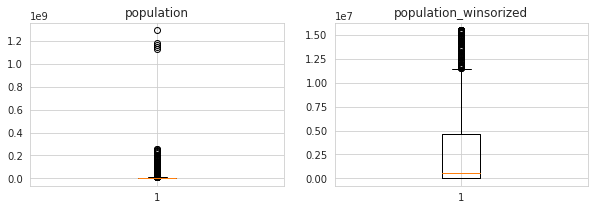

In [37]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["population"])
plt.title("population")

population_winsorized = winsorize(life_expectancy["population"], (0.1, 0.12))
plt.subplot (1,2,2)
plt.boxplot(population_winsorized)
plt.title("population_winsorized")

Text(0.5, 1.0, 'thinness_1_19_years_winsorized')

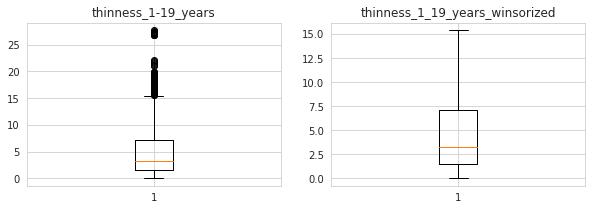

In [38]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["thinness_1-19_years"])
plt.title("thinness_1-19_years")

thinness_1_19_years_winsorized = winsorize(life_expectancy["thinness_1-19_years"], (0, 0.031))
plt.subplot (1,2,2)
plt.boxplot(thinness_1_19_years_winsorized)
plt.title("thinness_1_19_years_winsorized")

Text(0.5, 1.0, 'thinness_5_9_years_winsorized')

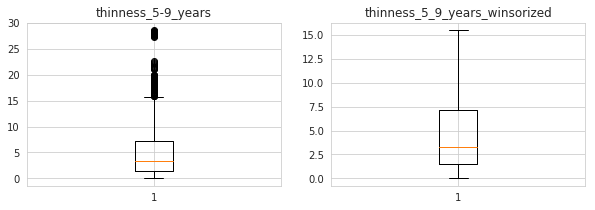

In [39]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["thinness_5-9_years"])
plt.title("thinness_5-9_years")

thinness_5_9_years_winsorized = winsorize(life_expectancy["thinness_5-9_years"], (0, 0.035))
plt.subplot (1,2,2)
plt.boxplot(thinness_5_9_years_winsorized)
plt.title("thinness_5_9_years_winsorized")

Text(0.5, 1.0, 'income_composition_of_resources_winsorized')

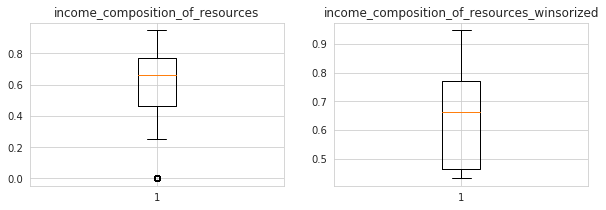

In [40]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["income_composition_of_resources"])
plt.title("income_composition_of_resources")

income_composition_of_resources_winsorized = winsorize(life_expectancy["income_composition_of_resources"], (0.2, 0))
plt.subplot (1,2,2)
plt.boxplot(income_composition_of_resources_winsorized)
plt.title("income_composition_of_resources_winsorized")

Text(0.5, 1.0, 'schooling_winsorized')

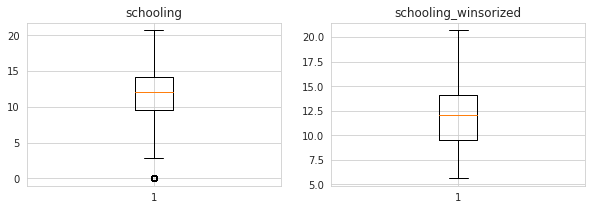

In [41]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["schooling"])
plt.title("schooling")

schooling_winsorized = winsorize(life_expectancy["schooling"], (0.1, 0))
plt.subplot (1,2,2)
plt.boxplot(schooling_winsorized)
plt.title("schooling_winsorized")

Text(0.5, 1.0, 'alcohol_winsorized')

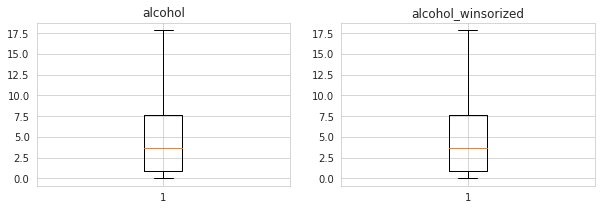

In [42]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["alcohol"])
plt.title("alcohol")

alcohol_winsorized = winsorize(life_expectancy["alcohol"], (0, 0))
plt.subplot (1,2,2)
plt.boxplot(alcohol_winsorized)
plt.title("alcohol_winsorized")

Text(0.5, 1.0, 'bmi_winsorized')

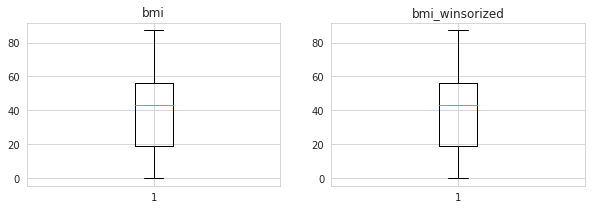

In [43]:
plt.figure(figsize=(10,3))
plt.subplot (1,2,1)
plt.boxplot(life_expectancy["bmi"])
plt.title("bmi")

bmi_winsorized = winsorize(life_expectancy["bmi"], (0, 0))
plt.subplot (1,2,2)
plt.boxplot(bmi_winsorized)
plt.title("bmi_winsorized")

In [45]:
# Checking to if we have eliminated outliers successfully:

winsorized_list = [life_expectancy_winsorized, adult_mortality_winsorized, infant_deaths_winsorized, 
                   alcohol_winsorized, percentage_expenditure_winsorized, hepatitis_b_winsorized,
                   measles_winsorized, bmi_winsorized, under_five_deaths_winsorized, polio_winsorized,
                   total_expenditure_winsorized, diphtheria_winsorized, hiv_aids_winsorized, gdp_winsorized, 
                   population_winsorized,thinness_1_19_years_winsorized, thinness_5_9_years_winsorized,
                   income_composition_of_resources_winsorized, schooling_winsorized]

for col in winsorized_list:
    q75, q25 = np.percentile(col, [75 ,25])
    iqr = q75 - q25


    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    print("Number of outliers after winsorization: {}".format(len(np.where((col > max_val) 
                      | (col < min_val))[0])))

Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 438
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0
Number of outliers after winsorization: 0


**II. Exploring the data using Univariate and Multivariate Techniques**

Univariate Analysis:

Let's use Panda's .describe() function to derive descriptive statistics of our data.

In [46]:
life_expectancy.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness_1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.00000,2938.000000
mean,2007.518720,68.989312,164.235534,30.303948,4.574228,738.251295,74.793336,2419.592240,37.877774,42.035739,82.396266,5.856477,82.183944,1.742103,6361.299758,9.925971e+06,4.783696,4.813955,0.59188,11.327434
std,4.613841,10.327437,124.451093,117.926501,4.042375,1987.914858,29.858640,11467.272489,20.344920,160.445548,23.476067,2.531511,23.743205,5.077785,13402.383592,5.407539e+07,4.424924,4.512880,0.25114,4.265626
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,2.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,2004.000000,63.000000,73.000000,0.000000,0.852500,4.685343,65.461538,0.000000,19.000000,0.000000,78.000000,4.220000,78.000000,0.100000,234.463634,6.281500e+03,1.500000,1.500000,0.46500,9.500000
50%,2008.000000,72.000000,144.000000,3.000000,3.685000,64.912906,88.000000,17.000000,43.000000,4.000000,93.000000,5.710000,93.000000,0.100000,1178.176979,5.448670e+05,3.300000,3.300000,0.66200,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.677500,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.77200,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.94800,20.700000


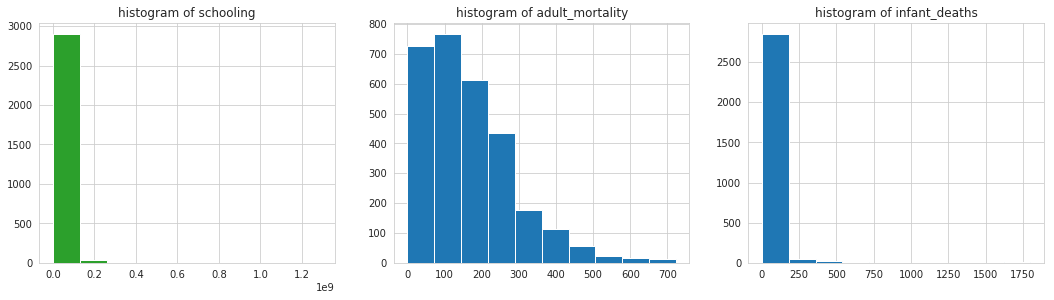

In [48]:
# Visualizing the data using histograms for numerical variables:

plt.figure(figsize=(18,15))

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["life_expectancy"])
plt.title("histogram of life_expectancy")

plt.subplot(3, 3, 2)
plt.hist(life_expectancy["adult_mortality"])
plt.title("histogram of adult_mortality")

plt.subplot(3, 3, 3)
plt.hist(life_expectancy["infant_deaths"])
plt.title("histogram of infant_deaths")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["alcohol"])
plt.title("histogram of alcohol")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["percentage_expenditure"])
plt.title("histogram of percentage_expenditure")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["hepatitis_b"])
plt.title("histogram of hepatitis_b")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["measles"])
plt.title("histogram of measles")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["bmi"])
plt.title("histogram of bmi")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["under-five_deaths"])
plt.title("histogram of under-five_deaths")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["polio"])
plt.title("histogram of polio")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["total_expenditure"])
plt.title("histogram of total_expenditure")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["diphtheria"])
plt.title("histogram of diphtheria")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["hiv/aids"])
plt.title("histogram of hiv/aids")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["gdp"])
plt.title("histogram of gdp")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["population"])
plt.title("histogram of population")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["thinness_1-19_years"])
plt.title("histogram of thinness_1-19_years")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["thinness_5-9_years"])
plt.title("histogram of thinness_5-9_years")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["income_composition_of_resources"])
plt.title("histogram of income_composition_of_resources")

plt.subplot(3, 3, 1)
plt.hist(life_expectancy["schooling"])
plt.title("histogram of schooling")

plt.show()

Let's now look into the descriptive statistics of winsorized values.

In [56]:
life_expectancy['life_expectancy_winsorized']= life_expectancy_winsorized
life_expectancy['adult_mortality_winsorized']=adult_mortality_winsorized
life_expectancy['infant_deaths_winsorized']=infant_deaths_winsorized
life_expectancy['alcohol_winsorized']=alcohol_winsorized
life_expectancy['percentage_expenditure_winsorized']= percentage_expenditure_winsorized
life_expectancy['hepatitis_b_winsorized']=hepatitis_b_winsorized
life_expectancy['measles_winsorized']=measles_winsorized
life_expectancy['bmi_winsorized']=bmi_winsorized
life_expectancy['under_five_deaths_winsorized']=under_five_deaths_winsorized
life_expectancy['polio_winsorized']=polio_winsorized
life_expectancy['total_expenditure_winsorized']=total_expenditure_winsorized
life_expectancy['diphtheria_winsorized/AIDS']=diphtheria_winsorized
life_expectancy['hiv_aids_winsorized']=hiv_aids_winsorized
life_expectancy['gdp_winsorized']=gdp_winsorized
life_expectancy['population_winsorized']=population_winsorized
life_expectancy['thinness_1_19_years_winsorized']=thinness_1_19_years_winsorized
life_expectancy['thinness_5_9_years_winsorized']=thinness_5_9_years_winsorized
life_expectancy['income_composition_of_resources_winsorized']=income_composition_of_resources_winsorized
life_expectancy['schooling_winsorized']=schooling_winsorized

In [57]:
winsorized_values = life_expectancy[['country', 'year', 'status','life_expectancy_winsorized', 'adult_mortality_winsorized',
       'infant_deaths_winsorized', 'alcohol_winsorized',
       'percentage_expenditure_winsorized', 'hepatitis_b_winsorized',
       'measles_winsorized', 'bmi_winsorized', 'under_five_deaths_winsorized',
       'polio_winsorized', 'total_expenditure_winsorized',
       'diphtheria_winsorized/AIDS', 'hiv_aids_winsorized', 'gdp_winsorized',
       'population_winsorized', 'thinness_1_19_years_winsorized',
       'thinness_5_9_years_winsorized',
       'income_composition_of_resources_winsorized', 'schooling_winsorized']]

In [58]:
winsorized_values.describe()

,year,life_expectancy_winsorized,adult_mortality_winsorized,infant_deaths_winsorized,alcohol_winsorized,percentage_expenditure_winsorized,hepatitis_b_winsorized,measles_winsorized,bmi_winsorized,under_five_deaths_winsorized,polio_winsorized,total_expenditure_winsorized,diphtheria_winsorized/AIDS,hiv_aids_winsorized,gdp_winsorized,population_winsorized,thinness_1_19_years_winsorized,thinness_5_9_years_winsorized,income_composition_of_resources_winsorized,schooling_winsorized
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.148673,161.330497,13.635126,4.574228,281.501093,77.550942,220.691287,37.877774,17.417971,85.303686,5.827762,85.476320,0.508237,3214.867490,3.507737e+06,4.650987,4.664398,0.641210,11.722124
std,4.613841,9.593575,115.532620,19.108928,4.042375,384.161450,23.706092,329.192321,20.344920,24.075262,15.630623,2.436980,15.118002,0.640847,3982.647069,5.365224e+06,3.966879,3.996149,0.159492,3.380832
min,2000.000000,44.300000,0.000000,0.000000,0.000000,0.000000,28.846154,0.000000,0.000000,0.000000,51.000000,0.000000,53.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.431000,5.600000
25%,2004.000000,63.000000,73.000000,0.000000,0.852500,4.685343,65.461538,0.000000,19.000000,0.000000,78.000000,4.220000,78.000000,0.100000,234.463634,6.281500e+03,1.500000,1.500000,0.465000,9.500000
50%,2008.000000,72.000000,144.000000,3.000000,3.685000,64.912906,88.000000,17.000000,43.000000,4.000000,93.000000,5.710000,93.000000,0.100000,1178.176979,5.448670e+05,3.300000,3.300000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.677500,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,452.000000,55.000000,17.870000,1077.712092,99.000000,831.000000,87.300000,66.000000,99.000000,12.230000,99.000000,1.700000,11224.154800,1.548419e+07,15.400000,15.500000,0.948000,20.700000


In [59]:
# Finding the correlation across all continuous features:
life_expectancy.corr()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,...,polio_winsorized,total_expenditure_winsorized,diphtheria_winsorized/AIDS,hiv_aids_winsorized,gdp_winsorized,population_winsorized,thinness_1_19_years_winsorized,thinness_5_9_years_winsorized,income_composition_of_resources_winsorized,schooling_winsorized
year,1.000000,0.129044,-0.083982,-0.037415,-0.047535,0.031400,0.114610,-0.082493,0.104665,-0.042937,...,0.120233,0.077554,0.151814,-0.087581,0.125905,0.033439,-0.049566,-0.050005,0.164610,0.174118
life_expectancy,0.129044,1.000000,-0.609053,-0.175069,0.400858,0.358442,0.086640,-0.140250,0.507116,-0.198861,...,0.529997,0.211314,0.538223,-0.718296,0.481319,-0.066455,-0.429768,-0.428484,0.737660,0.651910
adult_mortality,-0.083982,-0.609053,1.000000,0.079671,-0.200841,-0.240716,-0.049002,0.032032,-0.397616,0.095036,...,-0.348244,-0.135479,-0.350879,0.603258,-0.323367,0.082109,0.322136,0.330417,-0.516540,-0.422902
infant_deaths,-0.037415,-0.175069,0.079671,1.000000,-0.115209,-0.085612,-0.146567,0.501128,-0.224995,0.996629,...,-0.227709,-0.129770,-0.230760,0.098759,-0.142174,0.243887,0.312590,0.312533,-0.192189,-0.201719
alcohol,-0.047535,0.400858,-0.200841,-0.115209,1.000000,0.331534,-0.073789,-0.052214,0.339762,-0.111981,...,0.282570,0.324047,0.288277,-0.210473,0.394581,-0.003351,-0.430707,-0.422157,0.474888,0.455316
percentage_expenditure,0.031400,0.358442,-0.240716,-0.085612,0.331534,1.000000,-0.185197,-0.056596,0.231401,-0.087852,...,0.178647,0.187061,0.179937,-0.203100,0.627519,0.026587,-0.261625,-0.265507,0.465565,0.406587
hepatitis_b,0.114610,0.086640,-0.049002,-0.146567,-0.073789,-0.185197,1.000000,-0.095143,0.086516,-0.154460,...,0.388489,-0.021386,0.436281,-0.155046,-0.041925,-0.047903,0.027793,0.028698,0.045767,0.061842
measles,-0.082493,-0.140250,0.032032,0.501128,-0.052214,-0.056596,-0.095143,1.000000,-0.170780,0.507809,...,-0.164293,-0.104325,-0.164556,0.107629,-0.101665,0.091707,0.186632,0.183303,-0.137627,-0.152753
bmi,0.104665,0.507116,-0.397616,-0.224995,0.339762,0.231401,0.086516,-0.170780,1.000000,-0.235946,...,0.358690,0.258774,0.360459,-0.487031,0.367453,-0.088532,-0.514337,-0.523198,0.568543,0.529753
under-five_deaths,-0.042937,-0.198861,0.095036,0.996629,-0.111981,-0.087852,-0.154460,0.507809,-0.235946,1.000000,...,-0.249006,-0.131973,-0.252705,0.127980,-0.148299,0.248832,0.320503,0.319474,-0.208307,-0.216498


Let's now plot a Heatmap to visualize the mulivariate variables.

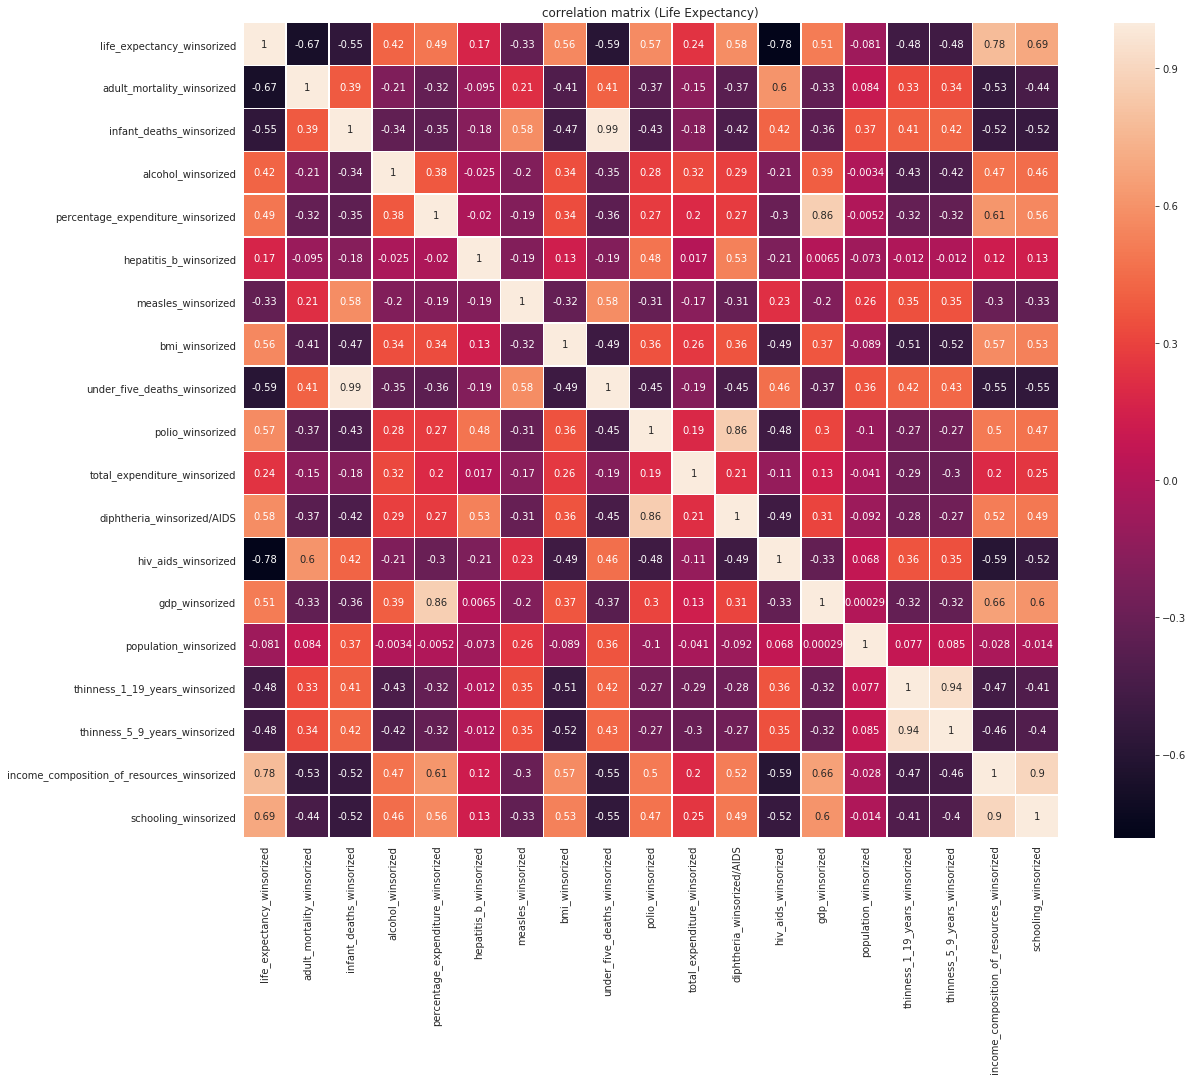

In [60]:
features = ['life_expectancy_winsorized', 'adult_mortality_winsorized',
       'infant_deaths_winsorized', 'alcohol_winsorized',
       'percentage_expenditure_winsorized', 'hepatitis_b_winsorized',
       'measles_winsorized', 'bmi_winsorized', 'under_five_deaths_winsorized',
       'polio_winsorized', 'total_expenditure_winsorized',
       'diphtheria_winsorized/AIDS', 'hiv_aids_winsorized', 'gdp_winsorized',
       'population_winsorized', 'thinness_1_19_years_winsorized',
       'thinness_5_9_years_winsorized',
       'income_composition_of_resources_winsorized', 'schooling_winsorized']

# making the correlation matrices.
plt.figure(figsize=(20,15))
sns.heatmap(winsorized_values[features].corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix (Life Expectancy)")
plt.show()

The heatmap above gives us a clear understanding of the correlation matrices between variables. The lighter colors indicate a higher correlation between variables. It is evident that the following variables are highly correlated:
- GDP and percent expenditure (0.86)
- diphitheria and polio (0.86)
- life expectancy and income (0.78)
- life expectancy and schooling (0.69)

**III. Feature Engineering**

In this phase, my task is to select a suite of variables which I believe is ideal for modelling. 

Since the target variable in this dataset is life expectancy, let's visualize the relationship of life expectancy along with other features in the dataset.

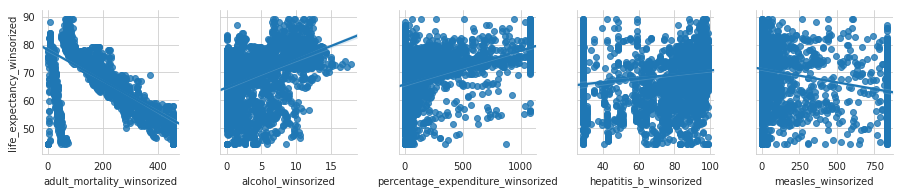

In [61]:
sns.pairplot(data=winsorized_values,
                  y_vars='life_expectancy_winsorized',
                  x_vars=['adult_mortality_winsorized','alcohol_winsorized','percentage_expenditure_winsorized', 'hepatitis_b_winsorized', 'measles_winsorized'], kind="reg")

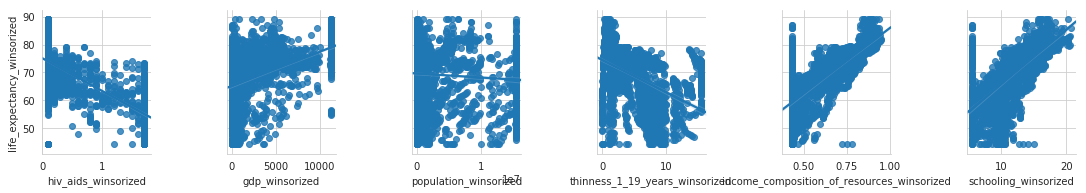

In [62]:
sns.pairplot(data=winsorized_values,
                  y_vars='life_expectancy_winsorized',
                  x_vars=['hiv_aids_winsorized', 'gdp_winsorized',
       'population_winsorized', 'thinness_1_19_years_winsorized',
       
       'income_composition_of_resources_winsorized', 'schooling_winsorized'], kind="reg")
plt.show()

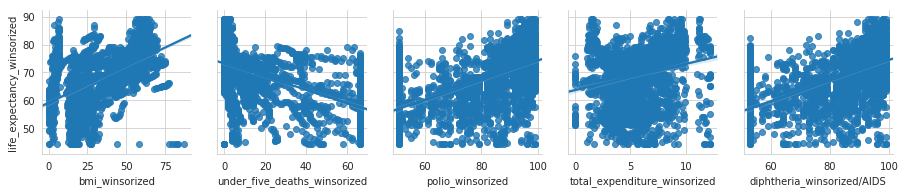

In [63]:
sns.pairplot(data=winsorized_values,
                  y_vars='life_expectancy_winsorized',
                  x_vars=['bmi_winsorized', 'under_five_deaths_winsorized',
       'polio_winsorized', 'total_expenditure_winsorized',
       'diphtheria_winsorized/AIDS'], kind="reg")

plt.show()

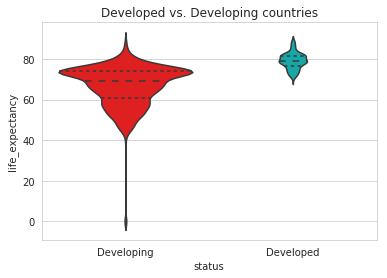

In [65]:
# Plotting a Violin plot to visualize the relationship of life expectancy between Developed and Developing countries.

sns.violinplot(x="status", y="life_expectancy",
            kind="violin",scale='count', inner='quartile', palette=["r", "c", "b"], data=life_expectancy);
plt.title('Developed vs. Developing countries')

plt.show()

In [66]:
life_expectancy[['status','life_expectancy']].groupby(['status']).mean()

,life_expectancy
status,
Developed,79.197852
Developing,66.834831


**Summary of the Findings**

In this challenge my goal was to find the factors that affect life expectancy and how it relates with different variables. 

My findings:

- First, I detected problems in the data such as missing values and outliers. To eliminate these, I performed data cleaning techniques such as filling in missing values with the mean and using winsorization to eliminate outliers.

- Second, I performed univariate and multivariate analysis to get a better understanding of the data. For this purpose, I used different data visualization techniques to visualize the relationships between single and multiple variables. From the heatmap above, we were able to analyze the variables that are highly correlated toward one another. These visualizations provides us a clear understanding of the relationships among different variables. 

- Third, in the feature engineering phase, I selected the variables that would be more suitable for modelling. I discarded the variables which are highly correlated to life expectancy such as "thinness 1-19 years".